# Visualising

Pandas plotting methods are good for histograms and lines when the index is the x axis. For categorical data / comparing distributions / most statistical use cases use seaborn.

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('data/dc-wikia-data-clean.csv')

## Let's recreate the plots from [the FiveThirtyEight report](https://fivethirtyeight.com/features/women-in-comic-books/)

Demo time!

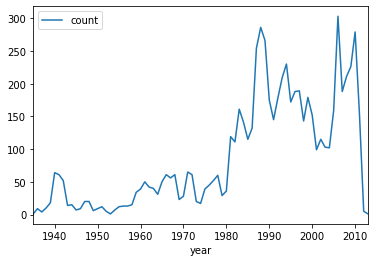

In [11]:
(
    df
    .groupby('year')
    .agg({'page_id': 'count'})
    .rename(columns={'page_id': 'count'})
    .plot()
)

In [ ]:
female = (
    df[df['sex'] == 'Female']
    .groupby('year')
    .agg({'page_id': 'count'})
    .cumsum()
)
all_ = (
    df
    .groupby('year')
    .agg({'page_id': 'count'})
    .cumsum()
)
(female / all_).dropna().plot()

## *Exercise*

Plot the total number of good characters over time. Plot the total number of bad characters over time. Are there more good or bad guys in DC universe today? When was the transition (approximately)?

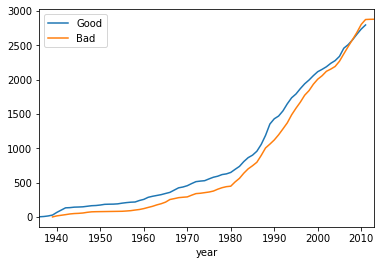

In [32]:
ax = (
    df[df['align'] == 'Good']
    .groupby('year')
    .agg({'page_id': 'count'})
    .rename(columns={'page_id': 'Good'})
    .cumsum()
    .plot()
)
(
    df[df['align'] == 'Bad']
    .groupby('year')
    .agg({'page_id': 'count'})
    .rename(columns={'page_id': 'Bad'})
    .cumsum()
    .plot(ax=ax)
)

In [50]:
good = (
    df[df['align'] == 'Good']
    .groupby('year')
    .agg({'page_id': 'count'})
    .rename(columns={'page_id': 'count'})
    .cumsum()
)
bad = (
    df[df['align'] == 'Bad']
    .groupby('year')
    .agg({'page_id': 'count'})
    .rename(columns={'page_id': 'count'})
    .cumsum()
)

diff = good.sub(bad, fill_value=0)['count']

# diff = (good - bad)['count']
diff[diff < 0].head(1)

year
2008.0   -4.0
Name: count, dtype: float64

In [47]:
(
    df
    .groupby(['align', 'year'])
    .agg({'page_id': 'count'})
    .rename(columns={'page_id': 'count'})
    .cumsum()
)
# diff = (good - bad)['count']
# diff[diff < 0].head()

count
align    year         
Bad      1939.0      4
         1940.0     19
         1941.0     28
         1942.0     37
         1943.0     47
...                ...
Neutral  2011.0   6229
         2012.0   6231
Reformed 1993.0   6232
         1998.0   6233
         2004.0   6234

[215 rows x 1 columns]

## Some seaborn

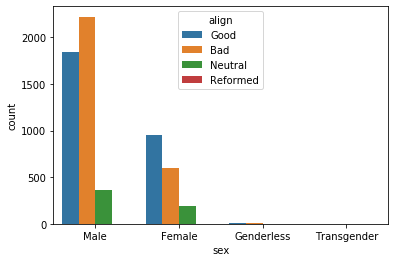

In [22]:
sns.countplot(x='sex', hue='align', data=df)

## *Semi exercise*

Go check the excellent [seaborn tutorial](https://seaborn.pydata.org/tutorial.html)!